In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"likithakyama","key":"15c0f788e05291978ca615ad6e6d7c8b"}'}

In [2]:
! pip install -q kaggle --upgrade

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d datafiniti/consumer-reviews-of-amazon-products

 31% 5.00M/16.3M [00:00<00:00, 30.3MB/s]
100% 16.3M/16.3M [00:00<00:00, 64.5MB/s]


In [7]:
! unzip /content/consumer-reviews-of-amazon-products.zip

Archive:  /content/consumer-reviews-of-amazon-products.zip
  inflating: 1429_1.csv              
  inflating: Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv  
  inflating: Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv  


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
df=df.drop(columns=['id','dateUpdated','reviews.date','reviews.dateSeen','dateAdded','asins','imageURLs','keys','manufacturerNumber','reviews.sourceURLs','sourceURLs','reviews.didPurchase','reviews.id','reviews.doRecommend','reviews.numHelpful'])
df.head()

,name,brand,categories,primaryCategories,manufacturer,reviews.rating,reviews.text,reviews.title,reviews.username
0,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang
1,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG
2,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert
3,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson
4,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda


In [10]:
df.describe()

,reviews.rating
count,28332.000000
mean,4.514048
std,0.934957
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               28332 non-null  object
 1   brand              28332 non-null  object
 2   categories         28332 non-null  object
 3   primaryCategories  28332 non-null  object
 4   manufacturer       28332 non-null  object
 5   reviews.rating     28332 non-null  int64 
 6   reviews.text       28332 non-null  object
 7   reviews.title      28332 non-null  object
 8   reviews.username   28332 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.9+ MB


In [12]:
df.sample(5)

,name,brand,categories,primaryCategories,manufacturer,reviews.rating,reviews.text,reviews.title,reviews.username
26266,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,Amazon,5,I bought this for my girlfriend as a Christmas...,Excellent gift,Mark
12270,Amazon Tap Smart Assistant Alexaenabled (black...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,Amazon,5,Always loved the Amazon Echo. Now we can rake ...,Amazon Echo with portable bluetooth speaker,Franco
14950,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,"Fire Tablets,Learning Toys,Toys,Tablets,Amazon...","Toys & Games,Electronics",Amazon,5,Bought for my eight year old. She absolutely l...,Great for kids,Ninja
23922,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,"Computers,Fire Tablets,Electronics Features,Co...",Electronics,Amazon,5,"Aiden's is loving his tablet, using educationa...",My baby love it,Evelyn
15836,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,"Fire Tablets,Learning Toys,Toys,Tablets,Amazon...","Toys & Games,Electronics",Amazon,5,This a great item for kids to learn how to use...,great tablet for a child,princess


In [13]:
df.isnull().sum()

name                 0
brand                0
categories           0
primaryCategories    0
manufacturer         0
reviews.rating       0
reviews.text         0
reviews.title        0
reviews.username     0
dtype: int64

In [14]:
df2=df[['reviews.rating','reviews.text']]
df2.sample(5)

,reviews.rating,reviews.text
12927,5,What a great ereader. Amazon continues its dom...
6310,5,I AM GOING TO BUY MORE. YOU CAN BEAT THAT PRIC...
5789,5,Great batteries... Great deal!!! Woo hoo Amazo...
27187,5,I needed to upgrade from the orginal Kindle fi...
9411,5,Great for the price.


<Axes: xlabel='reviews.rating', ylabel='count'>

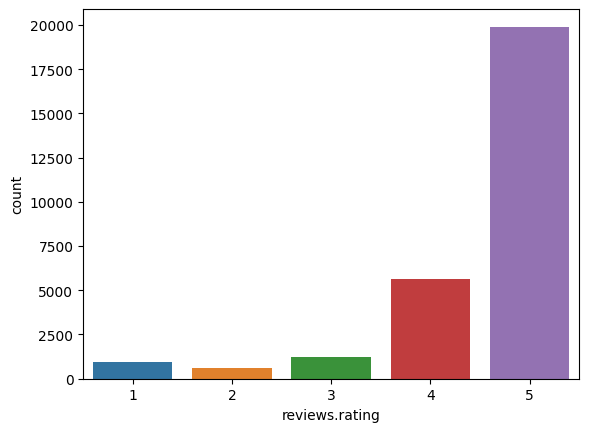

In [15]:
sns.countplot(x=df['reviews.rating'])

In [16]:
df2['reviews.text'][25]

'have not used yet but a battery is a battery good price'

In [17]:
! pip install wordcloud --upgrade
! pip install nltk --upgrade

In [18]:
import nltk
nltk.download("popular")
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords # Import the stop word list
from wordcloud import WordCloud
# stopwords.words("english")
from nltk import word_tokenize
from nltk.util import ngrams

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [19]:
def clean_sentences(df,col_name):
    reviews = []

    for sent in (df[col_name]):

        #remove html content
        review_text = BeautifulSoup(sent).get_text()

        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)

        #tokenize the sentences
        words = word_tokenize(review_text.lower())

        stops = set(stopwords.words("english"))
    #
        # 5. Remove stop words
        meaningful_words = [w for w in words if not w in stops]

        #lemmatize each word to its lemma
        # lemma_words = [lemmatizer.lemmatize(i) for i in meaningful_words]

        reviews.append(meaningful_words)

    return(reviews)

In [20]:
df2['Clean_reviews']=clean_sentences(df2,'reviews.text')
del df
df2.head()

,reviews.rating,reviews.text,Clean_reviews
0,3,I order 3 of them and one of the item is bad q...,"[order, one, item, bad, quality, missing, back..."
1,4,Bulk is always the less expensive way to go fo...,"[bulk, always, less, expensive, way, go, produ..."
2,5,Well they are not Duracell but for the price i...,"[well, duracell, price, happy]"
3,5,Seem to work as well as name brand batteries a...,"[seem, work, well, name, brand, batteries, muc..."
4,5,These batteries are very long lasting the pric...,"[batteries, long, lasting, price, great]"


In [21]:
def sentence_maker(unique_words):
  sentences=''
  for i in unique_words:
    for j in i:
      sentences+=''.join(j.strip())+' '
      # print(i)
      # break
  # print(sentences)
  return sentences

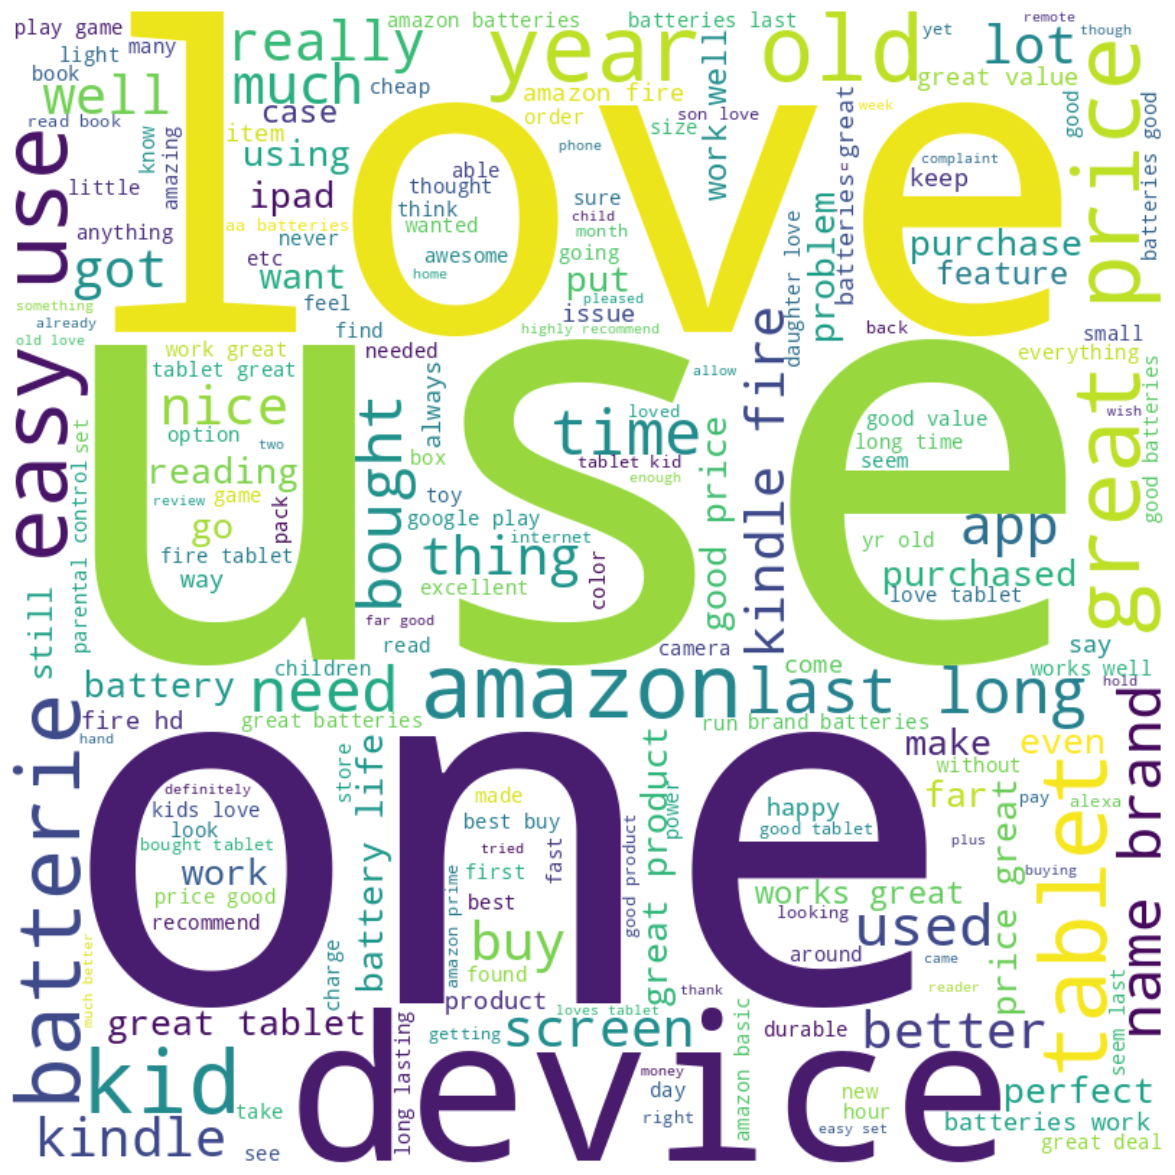

In [22]:
wc = WordCloud(width = 800, height = 800, background_color ='white',include_numbers=True,collocations=True,min_font_size = 10).generate(sentence_maker(df2['Clean_reviews']))
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
text_counts = cv.fit_transform(df2['reviews.text'])
text_counts.shape

(28332, 10361)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, df2['reviews.rating'], test_size=0.2, random_state=42,stratify=df2['reviews.rating'])
print(f'X_train shape is {X_train.shape},y_train shape is {y_train.shape}')

X_train shape is (22665, 10361),y_train shape is (22665,)


In [25]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes=MultinomialNB()
naive_bayes.fit(X_train,y_train)
nb_acc=naive_bayes.score(X_train,y_train)
print('Naive bayes accuracy is ',nb_acc)

Naive bayes accuracy is  0.7796161482461945


In [26]:
text='Product is awesome but battery is not working properly'

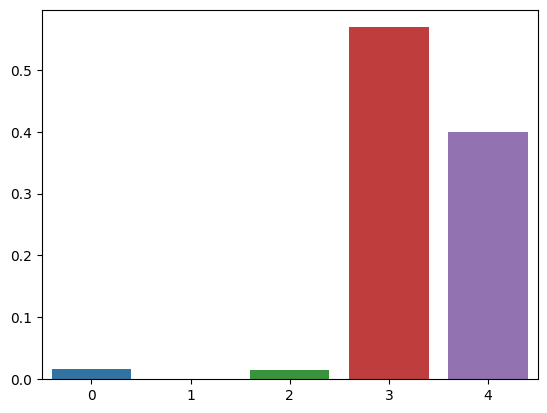

In [27]:
test_text = cv.transform([text])
# test_text
prob= naive_bayes.predict_proba(test_text)
pred=naive_bayes.predict(test_text)
results=pd.DataFrame(data=prob)
import seaborn as sns
sns.barplot(data=results)
plt.show()

In [28]:
from tensorflow.keras.utils import to_categorical
target=df2['reviews.rating'].values
y=to_categorical(target)
num_classes=y.shape[1]
num_classes

6

In [29]:
unique_words = set()
len_max = 0
for sent in (df2['Clean_reviews']):
    unique_words.update(sent)
    if(len_max<len(sent)):
        len_max = len(sent)


print(len(list(unique_words)))
print(len_max)

9808
708


In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
lstm_tokenizer = Tokenizer(num_words=len(list(unique_words)))
lstm_tokenizer.fit_on_texts(list(df2['Clean_reviews']))
lstm_tokenizer

In [31]:
from tensorflow.keras.preprocessing import sequence
train_token = lstm_tokenizer.texts_to_sequences(df2['Clean_reviews'])
train_pad = sequence.pad_sequences(train_token, maxlen=len_max)
print(train_pad.shape)

(28332, 708)


In [32]:
from sklearn.model_selection import train_test_split
X_train_lstm,X_test_lstm,y_train_lstm,y_test_lstm=train_test_split(train_pad,y,test_size=0.2,random_state=42,stratify=y)
print(f'X_train_lstm shape is {X_train_lstm.shape}, y_test_lstm shape is {y_test_lstm.shape}')

X_train_lstm shape is (22665, 708), y_test_lstm shape is (5667, 6)


In [33]:
from tensorflow.keras.layers import Dense,Dropout,Embedding,LSTM,Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

model=Sequential()
model.add(Embedding(len(list(unique_words)),300,input_length=len_max))
model.add((LSTM(128,dropout=0.5, recurrent_dropout=0.5,return_sequences=True)))
# model.add(Bidirectional(LSTM(128,dropout=0.5, recurrent_dropout=0.5,return_sequences=True)))
model.add((LSTM(64,dropout=0.5, recurrent_dropout=0.5,return_sequences=False)))
#model.add(LSTM(32,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 708, 300)          2942400   
                                                                 
 lstm (LSTM)                 (None, 708, 128)          219648    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 606       
                                                                 
Total params: 3218562 (12.28 MB)
Trainable params: 32185

In [34]:
early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='val_accuracy', patience = 2)
callback = [early_stopping]

In [36]:
history=model.fit(X_train_lstm, y_train_lstm, validation_data=(X_test_lstm, y_test_lstm),epochs=4, batch_size=128, callbacks=callback)

Epoch 1/4
178/178 [==============================] - 1932s 11s/step - loss: 0.7762 - accuracy: 0.7172 - val_loss: 0.7036 - val_accuracy: 0.7251
Epoch 2/4
178/178 [==============================] - 2031s 11s/step - loss: 0.6467 - accuracy: 0.7553 - val_loss: 0.6538 - val_accuracy: 0.7508
Epoch 3/4
178/178 [==============================] - 2003s 11s/step - loss: 0.5611 - accuracy: 0.7914 - val_loss: 0.6690 - val_accuracy: 0.7618
Epoch 4/4
178/178 [==============================] - 2189s 12s/step - loss: 0.5004 - accuracy: 0.8192 - val_loss: 0.6546 - val_accuracy: 0.7722


In [37]:
lstm_acc=model.evaluate(X_test_lstm,y_test_lstm)
lstm_acc

178/178 [==============================] - 103s 574ms/step - loss: 0.6546 - accuracy: 0.7722


[0.654625654220581, 0.7721898555755615]

Text(0.5, 1.0, 'val accuracy')

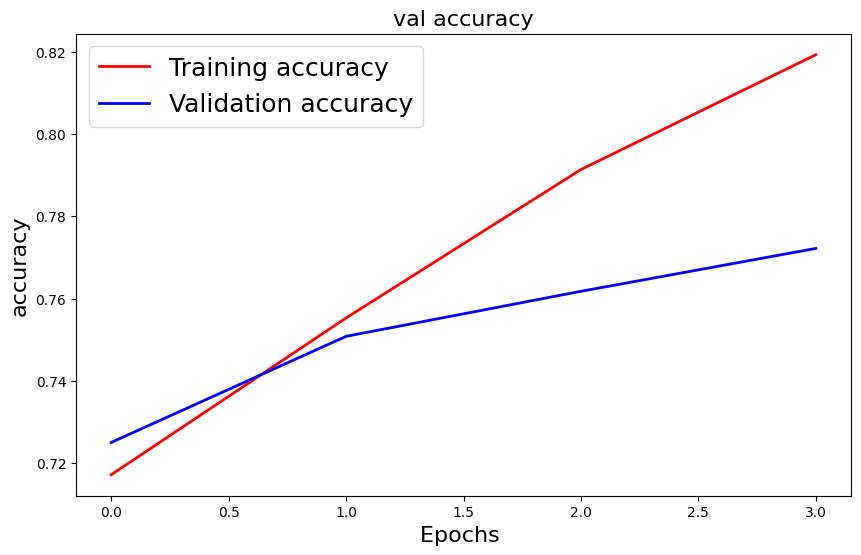

In [38]:
plt.figure(figsize=[10,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

In [39]:
def clean_text(text):
        reviews = []



        #remove html content
        review_text = BeautifulSoup(text).get_text()

        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)

        #tokenize the sentences
        words = word_tokenize(review_text.lower())

        stops = set(stopwords.words("english"))

        # Remove stop words
        meaningful_words = [w for w in words if not w in stops]

        #lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in meaningful_words]

        reviews.append(lemma_words)

        return(reviews)

In [41]:
df2.sample(7)

,reviews.rating,reviews.text,Clean_reviews
23219,5,Great camera for a beginner very easy to under...,"[great, camera, beginner, easy, understand]"
1859,5,good deal,"[good, deal]"
26939,5,I'm loving my kindle fire. It does everything ...,"[loving, kindle, fire, everything, need]"
16175,5,I bought this on Black Friday for 60 bucks and...,"[bought, black, friday, bucks, expecting, much..."
8845,5,Excellent,[excellent]
16559,4,"Not disappointed, if you want good screen for ...","[disappointed, want, good, screen, movies]"
25368,4,Great product and reasonable price! Suitable f...,"[great, product, reasonable, price, suitable, ..."


In [42]:
df2['reviews.text'][4048]

'great for the price and last as long as other name brand batteries'

In [48]:
text_clean=clean_text(text)
lstm_tokenizer.fit_on_texts(list(text_clean))
test_token = lstm_tokenizer.texts_to_sequences(text_clean)
test_pad = sequence.pad_sequences(test_token, maxlen=len_max)
test_pad.shape

(1, 708)

1/1 [==============================] - 1s 830ms/step
5


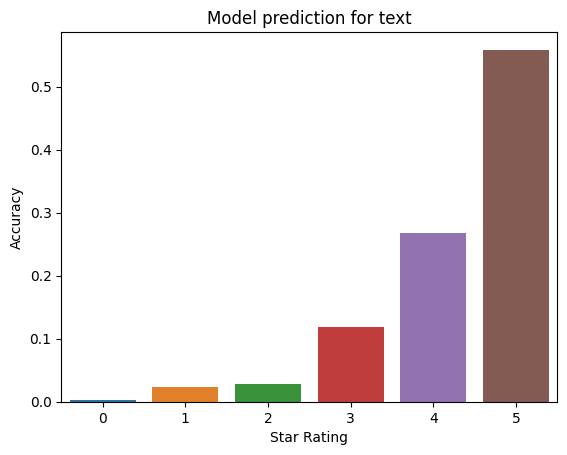

In [49]:
pred=model.predict(test_pad)
res=np.argmax(pred)
print(res)
pred_res=pd.DataFrame(data=pred)
import seaborn as sns
ax=sns.barplot(data=pred_res)
plt.title('Model prediction for text')
plt.xlabel('Star Rating')
plt.ylabel('Accuracy')
plt.show()

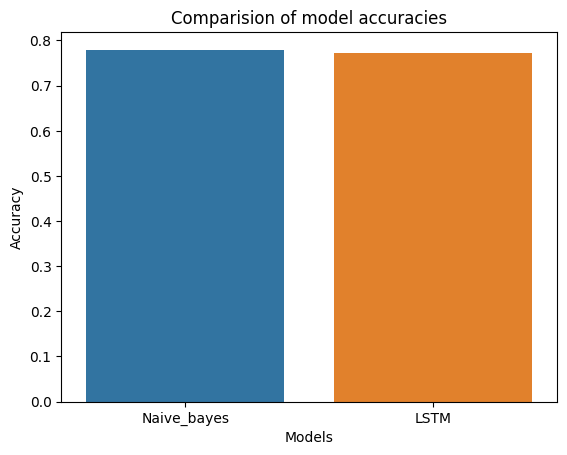

In [50]:
res={'Naive_bayes':[nb_acc],'LSTM':[np.max(lstm_acc)]}
results=pd.DataFrame(data=res)
# print(results.head())
sns.barplot(data=results)
plt.title('Comparision of model accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()